# Exploring Heart Rate Data - With Fitbit (or CSV)

A great tool to download your fitbit heart rate data from Fitbit is Neil Ricci's free downloader: https://iccir919.github.io/pulseWatch/public/intraday.html

from https://www.viralml.com/video-content.html?fm=yt&v=0XEu02dNhJQ

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
warnings.filterwarnings("ignore")

In [2]:
# open hear file

# download my pulse rate readings at: 
# 2021-09-23.csv

date_to_pull = '2021-09-23'
heart_df = pd.read_csv("2021-09-23.csv")
# heart_df['Time'] = datetime.datetime.today().strftime('%Y-%m-%d') + ' ' + heart_df['Time'] 
heart_df['Time'] = date_to_pull + ' ' + heart_df['Time'] 
heart_df['Time'] = pd.to_datetime(heart_df['Time'])  

heart_df.head()

,Time,Heart Rate
0,2021-09-23 00:00:03,89
1,2021-09-23 00:00:13,88
2,2021-09-23 00:00:18,87
3,2021-09-23 00:00:23,86
4,2021-09-23 00:00:38,86


In [3]:
heart_df.head()

,Time,Heart Rate
0,2021-09-23 00:00:03,89
1,2021-09-23 00:00:13,88
2,2021-09-23 00:00:18,87
3,2021-09-23 00:00:23,86
4,2021-09-23 00:00:38,86


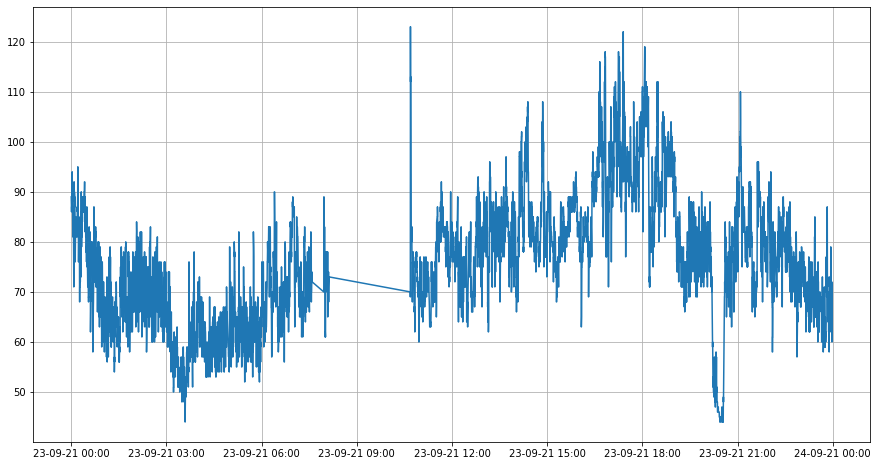

In [4]:
# plot the important features #
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(heart_df['Time'], heart_df['Heart Rate'])
xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
ax.xaxis.set_major_formatter(xfmt)
 
plt.grid()
plt.show()

In [5]:
heart_df['heart_pct'] = heart_df['Heart Rate'].pct_change().rolling(window=500).mean().values

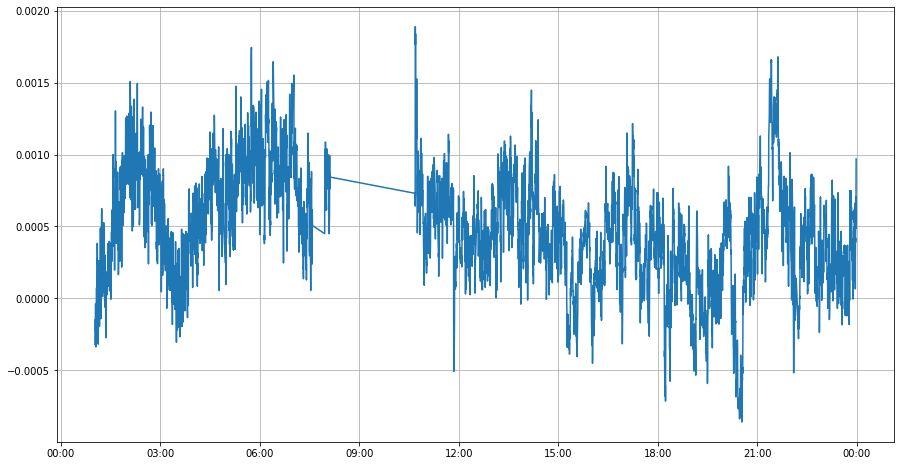

In [6]:
# plot the important features #
fig, ax = plt.subplots(figsize=(15,8))
plt.plot(heart_df['Time'], heart_df['heart_pct'])
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)
plt.grid()
plt.show()

In [7]:
heart_df['heart_ma'] = heart_df['Heart Rate'].rolling(window=500).mean().values

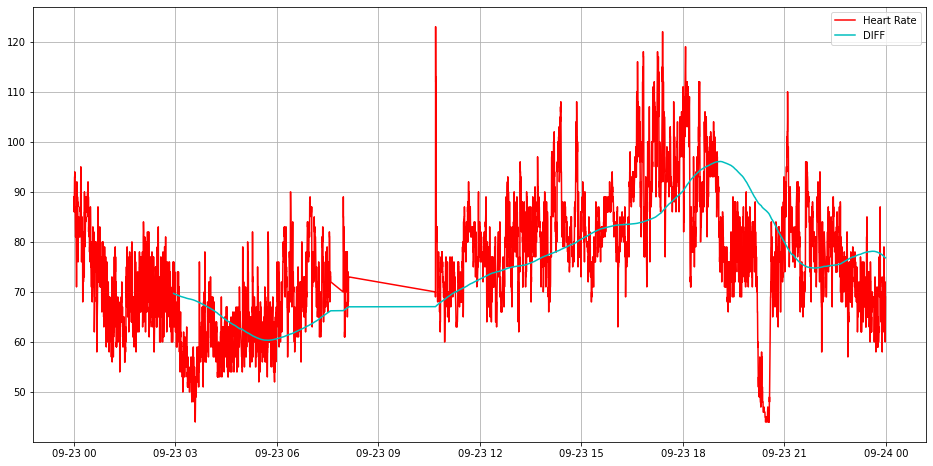

In [8]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(heart_df['Time'], heart_df['Heart Rate'], '-r', label='Heart Rate')
plt.plot(heart_df['Time'], heart_df['heart_ma'].rolling(window=1000).mean().values, 'c', label='DIFF')
plt.legend()
plt.grid()

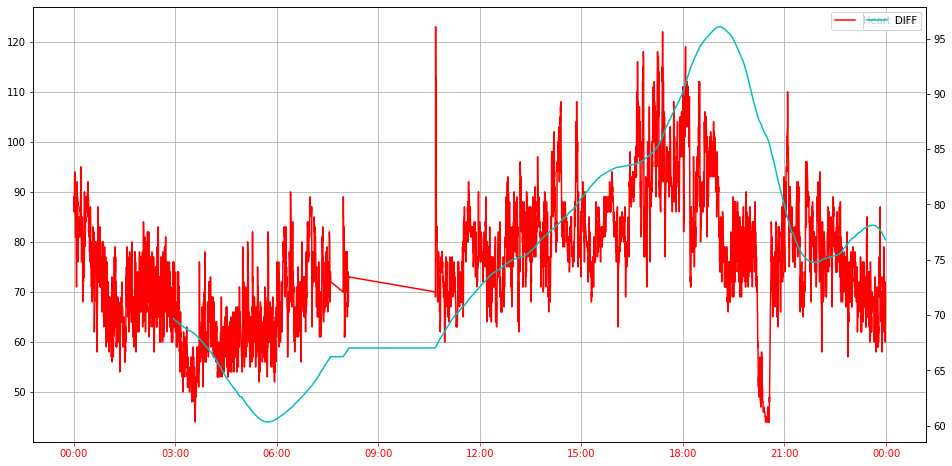

In [9]:
fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(heart_df['Time'], heart_df['Heart Rate'], '-r', label='Heart Rate')
plt.legend()
plt.grid()

ax.tick_params('x', colors='r')

 
# Get second axis
ax2 = ax.twinx()
#plt.plot(df['c'], 'b', label='Line c')
plt.plot(heart_df['Time'], heart_df['heart_ma'].rolling(window=1000).mean().values, 'c', label='DIFF')
plt.legend()
ax2.tick_params('x', colors='b')
myFmt = mdates.DateFormatter('%H:%M')
ax2.xaxis.set_major_formatter(myFmt)

## Candlestick Charting

In [10]:
# !pip3 install mpl_finance # eclipseIDE

In [15]:
tmp = heart_df.copy()
tmp.head()

# set time frame
time_grouper = '30Min' # '5Min'

tmp['date'] = [str(t)[-8:] for t in tmp['Time'].astype(str)]
tmp['date'].head()

0    00:00:03
1    00:00:13
2    00:00:18
3    00:00:23
4    00:00:38
Name: date, dtype: object

In [16]:
tmp = tmp.set_index('date')
tmp.index = pd.to_timedelta(tmp.index.astype(str))
#tmp = tmp.groupby(pd.TimeGrouper('5Min'))['Heart Rate'].mean()

tmp_open = tmp.groupby(pd.TimeGrouper(time_grouper))['Heart Rate'].nth([0])
tmp_close = tmp.groupby(pd.TimeGrouper(time_grouper))['Heart Rate'].nth([-1])
tmp = tmp.groupby(pd.TimeGrouper(time_grouper))['Heart Rate'].agg({'low': np.min,'high':np.max,'volume': np.sum}).reset_index()

tmp['open'] = tmp_open.values
tmp['close'] = tmp_close.values
tmp.head()

AttributeError: module 'pandas' has no attribute 'TimeGrouper'